In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle 
from astropy.io import fits
from spectral_cube import SpectralCube
import astropy.units as u
from astropy import units as u
import numpy.ma as ma
from astropy.stats import sigma_clip
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
import mpl_toolkits.axes_grid1.axes_grid as axes_grid
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from mpl_toolkits.axes_grid.colorbar import colorbar
from matplotlib.patches import Ellipse
from matplotlib.patches import Circle
import math
from matplotlib import cm
from astropy.wcs import WCS
import matplotlib.colors as colors
import pkg_resources
from astropy.modeling import models
from astropy import wcs

#%matplotlib notebook

In [3]:
globule = 'GlobC'
source1 = '12CO'
path1 = globule + '_' + source1 + '.image.pbcor.fits'
cube1 = fits.open(path1)
data_1 = cube1[0].data
header1 = cube1[0].header

data1_1 = data_1[0,:,:,:]

ra_start1 = header1["CRVAL1"]
ra_inc1 = header1["CDELT1"]

channels1 = np.arange(header1["NAXIS1"]) - header1["CRPIX1"]+1

ra1 = ra_start1 + (ra_inc1 * channels1)
ra1 = np.array(ra1, dtype = float)

dec_start1 = header1["CRVAL2"]
dec_inc1 = header1["CDELT2"]

channels1_1 = np.arange(header1["NAXIS2"]) - header1["CRPIX2"]+1

dec1 = dec_start1 + (dec_inc1 * channels1_1)
dec1 = np.array(dec1, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_1 = round(header1["CRPIX1"]-(ra_start1-337.43248)/ra_inc1)-1
    x2_1 = round(header1["CRPIX1"]-(ra_start1-337.428)/ra_inc1)-1
    y1_1 = round(header1["CRPIX2"]-(dec_start1+20.8175)/dec_inc1)-2
    y2_1 = round(header1["CRPIX2"]-(dec_start1+20.81354)/dec_inc1)-2
    d1 = 0.25
elif globule == 'GlobC':
    x1_1 = round(header1["CRPIX1"]-(ra_start1-337.40975)/ra_inc1)-1
    x2_1 = round(header1["CRPIX1"]-(ra_start1-337.40565)/ra_inc1)-1
    y1_1 = round(header1["CRPIX2"]-(dec_start1+20.80087)/dec_inc1)-1
    y2_1 = round(header1["CRPIX2"]-(dec_start1+20.796)/dec_inc1)-1
    d1 = 0
    
data2_1 = data1_1[:, :, np.arange(x1_1, x2_1)]
data3_1 = data2_1[:, np.arange(y1_1, y2_1), :]
    
integrated1 = np.sum(data3_1[:, :, :], axis = 0)
 
max_val1 = np.nanmax(integrated1)
    
a1 = [x for x in range(len(data1_1[:, 0, 0]))]
array1 = []
for i in range(len(a1)):
    if np.nanmax(data3_1[a1[i], :, :]) > d1*max_val1:
        array1.append(a1[i])
    
moment0_1 = np.sum(data3_1[array1, :, :], axis = 0)
    
max_value1 = np.nanmax(moment0_1)
min_value1 = np.nanmin(moment0_1)
    
extent1=[ra1[x1_1],ra1[x2_1],dec1[y1_1],dec1[y2_1]]
ra_x1 = np.linspace(ra1[x1_1], ra1[x2_1], (x2_1-x1_1))
dec_y1 = np.linspace(dec1[y1_1], dec1[y2_1], (y2_1-y1_1))

sigma_mask1 = sigma_clip(moment0_1, sigma=3, maxiters=None, cenfunc='mean')
newmask1 = (moment0_1 < np.amax(sigma_mask1))
    
mom0_1 = np.ma.array(moment0_1, mask = newmask1)

In [4]:
source2 = 'C18O'
path2 = globule + '_' + source2 + '.image.pbcor.fits'
cube2 = fits.open(path2)
data_2 = cube2[0].data
header2 = cube2[0].header

data1_2 = data_2[0,:,:,:]

ra_start2 = header2["CRVAL1"]
ra_inc2 = header2["CDELT1"]

channels2 = np.arange(header2["NAXIS1"]) - header2["CRPIX1"]+1

ra2 = ra_start2 + (ra_inc2 * channels2)
ra2 = np.array(ra2, dtype = float)

dec_start2 = header2["CRVAL2"]
dec_inc2 = header2["CDELT2"]

channels1_2 = np.arange(header2["NAXIS2"]) - header2["CRPIX2"]+1

dec2 = dec_start2 + (dec_inc2 * channels1_2)
dec2 = np.array(dec2, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_2 = round(header2["CRPIX1"]-(ra_start2-337.43248)/ra_inc2)-1
    x2_2 = round(header2["CRPIX1"]-(ra_start2-337.428)/ra_inc2)-1
    y1_2 = round(header2["CRPIX2"]-(dec_start2+20.8175)/dec_inc2)-2
    y2_2 = round(header2["CRPIX2"]-(dec_start2+20.81354)/dec_inc2)-2
    d2 = 0.28
elif globule == 'GlobC':
    x1_2 = round(header2["CRPIX1"]-(ra_start2-337.40975)/ra_inc2)-1
    x2_2 = round(header2["CRPIX1"]-(ra_start2-337.40565)/ra_inc2)-1
    y1_2 = round(header2["CRPIX2"]-(dec_start2+20.80087)/dec_inc2)-2
    y2_2 = round(header2["CRPIX2"]-(dec_start2+20.796)/dec_inc2)-2
    d2 = 0
    
data2_2 = data1_2[:, :, np.arange(x1_2, x2_2)]
data3_2 = data2_2[:, np.arange(y1_2, y2_2), :]
    
integrated2 = np.sum(data3_2[:, :, :], axis = 0)
 
max_val2 = np.nanmax(integrated2)
    
a2 = [x for x in range(len(data1_2[:, 0, 0]))]
array2 = []
for i in range(len(a2)):
    if np.nanmax(data3_2[a2[i], :, :]) > d2*max_val2:
        array2.append(a2[i])
    
moment0_2 = np.sum(data3_2[array2, :, :], axis = 0)
    
max_value2 = np.nanmax(moment0_2)
min_value2 = np.nanmin(moment0_2)
    
extent2=[ra2[x1_2],ra2[x2_2],dec2[y1_2],dec2[y2_2]]
ra_x2 = np.linspace(ra2[x1_2], ra2[x2_2], (x2_2-x1_2))
dec_y2 = np.linspace(dec2[y1_2], dec2[y2_2], (y2_2-y1_2))

sigma_mask2 = sigma_clip(moment0_2, sigma=3, maxiters=None, cenfunc='mean')
newmask2 = (moment0_2 < np.amax(sigma_mask2))
    
mom0_2 = np.ma.array(moment0_2, mask = newmask2)

In [5]:
source3 = 'CCH'
path3 = globule + '_' + source3 + '.image.pbcor.fits'
cube3 = fits.open(path3)
data_3 = cube3[0].data
header3 = cube3[0].header

data1_3 = data_3[0,:,:,:]

ra_start3 = header3["CRVAL1"]
ra_inc3 = header3["CDELT1"]

channels3 = np.arange(header3["NAXIS1"]) - header3["CRPIX1"]+1

ra3 = ra_start3 + (ra_inc3 * channels3)
ra3 = np.array(ra3, dtype = float)

dec_start3 = header3["CRVAL2"]
dec_inc3 = header3["CDELT2"]

channels1_3 = np.arange(header3["NAXIS2"]) - header3["CRPIX2"]+1

dec3 = dec_start3 + (dec_inc3 * channels1_3)
dec3 = np.array(dec3, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_3 = round(header3["CRPIX1"]-(ra_start3-337.43248)/ra_inc3)-1
    x2_3 = round(header3["CRPIX1"]-(ra_start3-337.428)/ra_inc3)-1
    y1_3 = round(header3["CRPIX2"]-(dec_start3+20.8175)/dec_inc3)-2
    y2_3 = round(header3["CRPIX2"]-(dec_start3+20.81354)/dec_inc3)-2
    d3 = 0.25
elif globule == 'GlobC':
    x1_3 = round(header3["CRPIX1"]-(ra_start3-337.40975)/ra_inc3)-1
    x2_3 = round(header3["CRPIX1"]-(ra_start3-337.40565)/ra_inc3)-1
    y1_3 = round(header3["CRPIX2"]-(dec_start3+20.80087)/dec_inc3)-2
    y2_3 = round(header3["CRPIX2"]-(dec_start3+20.796)/dec_inc3)-2
    d3 = 0.15
    
data2_3 = data1_3[:, :, np.arange(x1_3, x2_3)]
data3_3 = data2_3[:, np.arange(y1_3, y2_3), :]
    
integrated3 = np.sum(data3_3[:, :, :], axis = 0)
 
max_val3 = np.nanmax(integrated3)
    
a3 = [x for x in range(len(data1_3[:, 0, 0]))]
array3 = []
for i in range(len(a3)):
    if np.nanmax(data3_3[a3[i], :, :]) > d3*max_val3:
        array3.append(a3[i])
    
moment0_3 = np.sum(data3_3[array3, :, :], axis = 0)
    
max_value3 = np.nanmax(moment0_3)
min_value3 = np.nanmin(moment0_3)
    
extent3=[ra3[x1_3],ra3[x2_3],dec3[y1_3],dec3[y2_3]]
ra_x3 = np.linspace(ra3[x1_3], ra3[x2_3], (x2_3-x1_3))
dec_y3 = np.linspace(dec3[y1_3], dec3[y2_3], (y2_3-y1_3))

sigma_mask3 = sigma_clip(moment0_3, sigma=3, maxiters=None, cenfunc='mean')
newmask3 = (moment0_3 < np.amax(sigma_mask3))
    
mom0_3 = np.ma.array(moment0_3, mask = newmask3)

In [6]:
source4 = 'CCH_32'
path4 = globule + '_' + source4 + '.image.pbcor.fits'
cube4 = fits.open(path4)
data_4 = cube4[0].data
header4 = cube4[0].header

data1_4 = data_4[0,:,:,:]

ra_start4 = header4["CRVAL1"]
ra_inc4 = header4["CDELT1"]

channels4 = np.arange(header4["NAXIS1"]) - header4["CRPIX1"]+1

ra4 = ra_start4 + (ra_inc4 * channels4)
ra4 = np.array(ra4, dtype = float)

dec_start4 = header4["CRVAL2"]
dec_inc4 = header4["CDELT2"]

channels1_4 = np.arange(header4["NAXIS2"]) - header4["CRPIX2"]+1

dec4 = dec_start4 + (dec_inc4 * channels1_4)
dec4 = np.array(dec4, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_4 = round(header4["CRPIX1"]-(ra_start4-337.43248)/ra_inc4)-1
    x2_4 = round(header4["CRPIX1"]-(ra_start4-337.428)/ra_inc4)-1
    y1_4 = round(header4["CRPIX2"]-(dec_start4+20.8175)/dec_inc4)-2
    y2_4 = round(header4["CRPIX2"]-(dec_start4+20.81354)/dec_inc4)-2
    d4 = 0.15
elif globule == 'GlobC':
    x1_4 = round(header4["CRPIX1"]-(ra_start4-337.40975)/ra_inc4)-1
    x2_4 = round(header4["CRPIX1"]-(ra_start4-337.40565)/ra_inc4)-1
    y1_4 = round(header4["CRPIX2"]-(dec_start4+20.80087)/dec_inc4)-2
    y2_4 = round(header4["CRPIX2"]-(dec_start4+20.796)/dec_inc4)-2
    d4 = 0.08
    
data2_4 = data1_4[:, :, np.arange(x1_4, x2_4)]
data3_4 = data2_4[:, np.arange(y1_4, y2_4), :]
    
integrated4 = np.sum(data3_4[:, :, :], axis = 0)
 
max_val4 = np.nanmax(integrated4)
    
a4 = [x for x in range(len(data1_4[:, 0, 0]))]
array4 = []
for i in range(len(a4)):
    if np.nanmax(data3_4[a4[i], :, :]) > d4*max_val4:
        array4.append(a4[i])
    
moment0_4 = np.sum(data3_4[array4, :, :], axis = 0)
    
max_value4 = np.nanmax(moment0_4)
min_value4 = np.nanmin(moment0_4)
    
extent4=[ra4[x1_4],ra4[x2_4],dec4[y1_4],dec4[y2_4]]
ra_x4 = np.linspace(ra4[x1_4], ra4[x2_4], (x2_4-x1_4))
dec_y4 = np.linspace(dec4[y1_4], dec4[y2_4], (y2_4-y1_4))

sigma_mask4 = sigma_clip(moment0_4, sigma=3, maxiters=None, cenfunc='mean')
newmask4 = (moment0_4 < np.amax(sigma_mask4))
    
mom0_4 = np.ma.array(moment0_4, mask = newmask4)

In [7]:
source5 = 'HC3N'
path5 = globule + '_' + source5 + '.image.pbcor.fits'
cube5 = fits.open(path5)
data_5 = cube5[0].data
header5 = cube5[0].header

data1_5 = data_5[0,:,:,:]

ra_start5 = header5["CRVAL1"]
ra_inc5 = header5["CDELT1"]

channels5 = np.arange(header5["NAXIS1"]) - header5["CRPIX1"]+1

ra5 = ra_start5 + (ra_inc5 * channels5)
ra5 = np.array(ra5, dtype = float)

dec_start5 = header5["CRVAL2"]
dec_inc5 = header5["CDELT2"]

channels1_5 = np.arange(header5["NAXIS2"]) - header5["CRPIX2"]+1

dec5 = dec_start5 + (dec_inc5 * channels1_5)
dec5 = np.array(dec5, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_5 = round(header5["CRPIX1"]-(ra_start5-337.43248)/ra_inc5)-1
    x2_5 = round(header5["CRPIX1"]-(ra_start5-337.428)/ra_inc5)-1
    y1_5 = round(header5["CRPIX2"]-(dec_start5+20.8175)/dec_inc5)-2
    y2_5 = round(header5["CRPIX2"]-(dec_start5+20.81354)/dec_inc5)-2
    d5 = 0.3
elif globule == 'GlobC':
    x1_5 = round(header5["CRPIX1"]-(ra_start5-337.40975)/ra_inc5)-1
    x2_5 = round(header5["CRPIX1"]-(ra_start5-337.40565)/ra_inc5)-1
    y1_5 = round(header5["CRPIX2"]-(dec_start5+20.80087)/dec_inc5)-2
    y2_5 = round(header5["CRPIX2"]-(dec_start5+20.796)/dec_inc5)-2
    d5 = 0.25
    
data2_5 = data1_5[:, :, np.arange(x1_5, x2_5)]
data3_5 = data2_5[:, np.arange(y1_5, y2_5), :]
    
integrated5 = np.sum(data3_5[:, :, :], axis = 0)
 
max_val5 = np.nanmax(integrated5)
    
a5 = [x for x in range(len(data1_5[:, 0, 0]))]
array5 = []
for i in range(len(a5)):
    if np.nanmax(data3_5[a5[i], :, :]) > d5*max_val5:
        array5.append(a5[i])
    
moment0_5 = np.sum(data3_5[array5, :, :], axis = 0)
    
max_value5 = np.nanmax(moment0_5)
min_value5 = np.nanmin(moment0_5)
    
extent5=[ra5[x1_5],ra5[x2_5],dec5[y1_5],dec5[y2_5]]
ra_x5 = np.linspace(ra5[x1_5], ra5[x2_5], (x2_5-x1_5))
dec_y5 = np.linspace(dec5[y1_5], dec5[y2_5], (y2_5-y1_5))

sigma_mask5 = sigma_clip(moment0_5, sigma=3, maxiters=None, cenfunc='mean')
newmask5 = (moment0_5 < np.amax(sigma_mask5))
    
mom0_5 = np.ma.array(moment0_5, mask = newmask5)

In [8]:
source6 = 'HCN'
path6 = globule + '_' + source6 + '.image.pbcor.fits'
cube6 = fits.open(path6)
data_6 = cube6[0].data
header6 = cube6[0].header

data1_6 = data_6[0,:,:,:]

ra_start6 = header6["CRVAL1"]
ra_inc6 = header6["CDELT1"]

channels6 = np.arange(header6["NAXIS1"]) - header6["CRPIX1"]+1

ra6 = ra_start6 + (ra_inc6 * channels6)
ra6 = np.array(ra6, dtype = float)

dec_start6 = header6["CRVAL2"]
dec_inc6 = header6["CDELT2"]

channels1_6 = np.arange(header6["NAXIS2"]) - header6["CRPIX2"]+1

dec6 = dec_start6 + (dec_inc6 * channels1_6)
dec6 = np.array(dec6, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_6 = round(header6["CRPIX1"]-(ra_start6-337.43248)/ra_inc6)-1
    x2_6 = round(header6["CRPIX1"]-(ra_start6-337.428)/ra_inc6)-1
    y1_6 = round(header6["CRPIX2"]-(dec_start6+20.8175)/dec_inc6)-2
    y2_6 = round(header6["CRPIX2"]-(dec_start6+20.81354)/dec_inc6)-2
    d6 = 0.06
elif globule == 'GlobC':
    x1_6 = round(header6["CRPIX1"]-(ra_start6-337.40975)/ra_inc6)-1
    x2_6 = round(header6["CRPIX1"]-(ra_start6-337.40565)/ra_inc6)-1
    y1_6 = round(header6["CRPIX2"]-(dec_start6+20.80087)/dec_inc6)-2
    y2_6 = round(header6["CRPIX2"]-(dec_start6+20.796)/dec_inc6)-2
    d6 = 0.08
    
data2_6 = data1_6[:, :, np.arange(x1_6, x2_6)]
data3_6 = data2_6[:, np.arange(y1_6, y2_6), :]
    
integrated6 = np.sum(data3_6[:, :, :], axis = 0)
 
max_val6 = np.nanmax(integrated6)
    
a6 = [x for x in range(len(data1_6[:, 0, 0]))]
array6 = []
for i in range(len(a6)):
    if np.nanmax(data3_6[a6[i], :, :]) > d6*max_val6:
        array6.append(a6[i])
    
moment0_6 = np.sum(data3_6[array6, :, :], axis = 0)
    
max_value6 = np.nanmax(moment0_6)
min_value6 = np.nanmin(moment0_6)
    
extent6=[ra6[x1_6],ra6[x2_6],dec6[y1_6],dec6[y2_6]]
ra_x6 = np.linspace(ra6[x1_6], ra6[x2_6], (x2_6-x1_6))
dec_y6 = np.linspace(dec6[y1_6], dec6[y2_6], (y2_6-y1_6))

sigma_mask6 = sigma_clip(moment0_6, sigma=3, maxiters=None, cenfunc='mean')
newmask6 = (moment0_6 < np.amax(sigma_mask6))
    
mom0_6 = np.ma.array(moment0_6, mask = newmask6)

In [9]:
source7 = 'HCN_32'
path7 = globule + '_' + source7 + '.image.pbcor.fits'
cube7 = fits.open(path7)
data_7 = cube7[0].data
header7 = cube7[0].header

data1_7 = data_7[0,:,:,:]

ra_start7 = header7["CRVAL1"]
ra_inc7 = header7["CDELT1"]

channels7 = np.arange(header7["NAXIS1"]) - header7["CRPIX1"]+1

ra7 = ra_start7 + (ra_inc7 * channels7)
ra7 = np.array(ra7, dtype = float)

dec_start7 = header7["CRVAL2"]
dec_inc7 = header7["CDELT2"]

channels1_7 = np.arange(header7["NAXIS2"]) - header7["CRPIX2"]+1

dec7 = dec_start7 + (dec_inc7 * channels1_7)
dec7 = np.array(dec7, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_7 = round(header7["CRPIX1"]-(ra_start7-337.43248)/ra_inc7)-1
    x2_7 = round(header7["CRPIX1"]-(ra_start7-337.428)/ra_inc7)-1
    y1_7 = round(header7["CRPIX2"]-(dec_start7+20.8175)/dec_inc7)-2
    y2_7 = round(header7["CRPIX2"]-(dec_start7+20.81354)/dec_inc7)-2
    d7 = 0.065
elif globule == 'GlobC':
    x1_7 = round(header7["CRPIX1"]-(ra_start7-337.40975)/ra_inc7)-1
    x2_7 = round(header7["CRPIX1"]-(ra_start7-337.40565)/ra_inc7)-1
    y1_7 = round(header7["CRPIX2"]-(dec_start7+20.80087)/dec_inc7)-2
    y2_7 = round(header7["CRPIX2"]-(dec_start7+20.796)/dec_inc7)-2
    d7 = 0.04
    
data2_7 = data1_7[:, :, np.arange(x1_7, x2_7)]
data3_7 = data2_7[:, np.arange(y1_7, y2_7), :]
    
integrated7 = np.sum(data3_7[:, :, :], axis = 0)
 
max_val7 = np.nanmax(integrated7)
    
a7 = [x for x in range(len(data1_7[:, 0, 0]))]
array7 = []
for i in range(len(a7)):
    if np.nanmax(data3_7[a7[i], :, :]) > d7*max_val7:
        array7.append(a7[i])
    
moment0_7 = np.sum(data3_7[array7, :, :], axis = 0)
    
max_value7 = np.nanmax(moment0_7)
min_value7 = np.nanmin(moment0_7)
    
extent7=[ra7[x1_7],ra7[x2_7],dec7[y1_7],dec7[y2_7]]
ra_x7 = np.linspace(ra7[x1_7], ra7[x2_7], (x2_7-x1_7))
dec_y7 = np.linspace(dec7[y1_7], dec7[y2_7], (y2_7-y1_7))

sigma_mask7 = sigma_clip(moment0_7, sigma=3, maxiters=None, cenfunc='mean')
newmask7 = (moment0_7 < np.amax(sigma_mask7))
    
mom0_7 = np.ma.array(moment0_7, mask = newmask7)

In [10]:
source8 = 'HCOp'
path8 = globule + '_' + source8 + '.image.pbcor.fits'
cube8 = fits.open(path8)
data_8 = cube8[0].data
header8 = cube8[0].header

data1_8 = data_8[0,:,:,:]

ra_start8 = header8["CRVAL1"]
ra_inc8 = header8["CDELT1"]

channels8 = np.arange(header8["NAXIS1"]) - header8["CRPIX1"]+1

ra8 = ra_start8 + (ra_inc8 * channels8)
ra8 = np.array(ra8, dtype = float)

dec_start8 = header8["CRVAL2"]
dec_inc8 = header8["CDELT2"]

channels1_8 = np.arange(header8["NAXIS2"]) - header8["CRPIX2"]+1

dec8 = dec_start8 + (dec_inc8 * channels1_8)
dec8 = np.array(dec8, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_8 = round(header8["CRPIX1"]-(ra_start8-337.43248)/ra_inc8)-1
    x2_8 = round(header8["CRPIX1"]-(ra_start8-337.428)/ra_inc8)-1
    y1_8 = round(header8["CRPIX2"]-(dec_start8+20.8175)/dec_inc8)-2
    y2_8 = round(header8["CRPIX2"]-(dec_start8+20.81354)/dec_inc8)-2
    d8 = 0.08
elif globule == 'GlobC':
    x1_8 = round(header8["CRPIX1"]-(ra_start8-337.40975)/ra_inc8)-1
    x2_8 = round(header8["CRPIX1"]-(ra_start8-337.40565)/ra_inc8)-1
    y1_8 = round(header8["CRPIX2"]-(dec_start8+20.80087)/dec_inc8)-2
    y2_8 = round(header8["CRPIX2"]-(dec_start8+20.796)/dec_inc8)-2
    d8 = 0.1
    
data2_8 = data1_8[:, :, np.arange(x1_8, x2_8)]
data3_8 = data2_8[:, np.arange(y1_8, y2_8), :]
    
integrated8 = np.sum(data3_8[:, :, :], axis = 0)
 
max_val8 = np.nanmax(integrated8)
    
a8 = [x for x in range(len(data1_8[:, 0, 0]))]
array8 = []
for i in range(len(a8)):
    if np.nanmax(data3_8[a8[i], :, :]) > d8*max_val8:
        array8.append(a8[i])
    
moment0_8 = np.sum(data3_8[array8, :, :], axis = 0)
    
max_value8 = np.nanmax(moment0_8)
min_value8 = np.nanmin(moment0_8)
    
extent8=[ra8[x1_8],ra8[x2_8],dec8[y1_8],dec8[y2_8]]
ra_x8 = np.linspace(ra8[x1_8], ra8[x2_8], (x2_8-x1_8))
dec_y8 = np.linspace(dec8[y1_8], dec8[y2_8], (y2_8-y1_8))

sigma_mask8 = sigma_clip(moment0_8, sigma=3, maxiters=None, cenfunc='mean')
newmask8 = (moment0_8 < np.amax(sigma_mask8))
    
mom0_8 = np.ma.array(moment0_8, mask = newmask8)

In [11]:
source9 = 'HCOp_32'
path9 = globule + '_' + source9 + '.image.pbcor.fits'
cube9 = fits.open(path9)
data_9 = cube9[0].data
header9 = cube9[0].header

data1_9 = data_9[0,:,:,:]

ra_start9 = header9["CRVAL1"]
ra_inc9 = header9["CDELT1"]

channels9 = np.arange(header9["NAXIS1"]) - header9["CRPIX1"]+1

ra9 = ra_start9 + (ra_inc9 * channels9)
ra9 = np.array(ra9, dtype = float)

dec_start9 = header9["CRVAL2"]
dec_inc9 = header9["CDELT2"]

channels1_9 = np.arange(header9["NAXIS2"]) - header9["CRPIX2"]+1

dec9 = dec_start9 + (dec_inc9 * channels1_9)
dec9 = np.array(dec9, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_9 = round(header9["CRPIX1"]-(ra_start9-337.43248)/ra_inc9)-1
    x2_9 = round(header9["CRPIX1"]-(ra_start9-337.428)/ra_inc9)-1
    y1_9 = round(header9["CRPIX2"]-(dec_start9+20.8175)/dec_inc9)-2
    y2_9 = round(header9["CRPIX2"]-(dec_start9+20.81354)/dec_inc9)-2
    d9 = 0.1
elif globule == 'GlobC':
    x1_9 = round(header9["CRPIX1"]-(ra_start9-337.40975)/ra_inc9)-1
    x2_9 = round(header9["CRPIX1"]-(ra_start9-337.40565)/ra_inc9)-1
    y1_9 = round(header9["CRPIX2"]-(dec_start9+20.80087)/dec_inc9)-2
    y2_9 = round(header9["CRPIX2"]-(dec_start9+20.796)/dec_inc9)-2
    d9 = 0.08
    
data2_9 = data1_9[:, :, np.arange(x1_9, x2_9)]
data3_9 = data2_9[:, np.arange(y1_9, y2_9), :]
    
integrated9 = np.sum(data3_9[:, :, :], axis = 0)
 
max_val9 = np.nanmax(integrated9)
    
a9 = [x for x in range(len(data1_9[:, 0, 0]))]
array9 = []
for i in range(len(a9)):
    if np.nanmax(data3_9[a9[i], :, :]) > d9*max_val9:
        array9.append(a9[i])
    
moment0_9 = np.sum(data3_9[array9, :, :], axis = 0)
    
max_value9 = np.nanmax(moment0_9)
min_value9 = np.nanmin(moment0_9)
    
extent9=[ra9[x1_9],ra9[x2_9],dec9[y1_9],dec9[y2_9]]
ra_x9 = np.linspace(ra9[x1_9], ra9[x2_9], (x2_9-x1_9))
dec_y9 = np.linspace(dec9[y1_9], dec9[y2_9], (y2_9-y1_9))

sigma_mask9 = sigma_clip(moment0_9, sigma=3, maxiters=None, cenfunc='mean')
newmask9 = (moment0_9 < np.amax(sigma_mask9))
    
mom0_9 = np.ma.array(moment0_9, mask = newmask9)

In [12]:
source10 = 'HNC'
path10 = globule + '_' + source10 + '.image.pbcor.fits'
cube10 = fits.open(path10)
data_10 = cube10[0].data
header10 = cube10[0].header

data1_10 = data_10[0,:,:,:]

ra_start10 = header10["CRVAL1"]
ra_inc10 = header10["CDELT1"]

channels10 = np.arange(header10["NAXIS1"]) - header10["CRPIX1"]+1

ra10 = ra_start10 + (ra_inc10 * channels10)
ra10 = np.array(ra10, dtype = float)

dec_start10 = header10["CRVAL2"]
dec_inc10 = header10["CDELT2"]

channels1_10 = np.arange(header10["NAXIS2"]) - header10["CRPIX2"]+1

dec10 = dec_start10 + (dec_inc10 * channels1_10)
dec10 = np.array(dec10, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_10 = round(header10["CRPIX1"]-(ra_start10-337.43248)/ra_inc10)-1
    x2_10 = round(header10["CRPIX1"]-(ra_start10-337.428)/ra_inc10)-1
    y1_10 = round(header10["CRPIX2"]-(dec_start10+20.8175)/dec_inc10)-2
    y2_10 = round(header10["CRPIX2"]-(dec_start10+20.81354)/dec_inc10)-2
    d10 = 0.3
elif globule == 'GlobC':
    x1_10 = round(header10["CRPIX1"]-(ra_start10-337.40975)/ra_inc10)-1
    x2_10 = round(header10["CRPIX1"]-(ra_start10-337.40565)/ra_inc10)-1
    y1_10 = round(header10["CRPIX2"]-(dec_start10+20.80087)/dec_inc10)-2
    y2_10 = round(header10["CRPIX2"]-(dec_start10+20.796)/dec_inc10)-2
    d10 = 0.08
    
data2_10 = data1_10[:, :, np.arange(x1_10, x2_10)]
data3_10 = data2_10[:, np.arange(y1_10, y2_10), :]
    
integrated10 = np.sum(data3_10[:, :, :], axis = 0)
 
max_val10 = np.nanmax(integrated10)
    
a10 = [x for x in range(len(data1_10[:, 0, 0]))]
array10 = []
for i in range(len(a10)):
    if np.nanmax(data3_10[a10[i], :, :]) > d10*max_val10:
        array10.append(a10[i])
    
moment0_10 = np.sum(data3_10[array10, :, :], axis = 0)
    
max_value10 = np.nanmax(moment0_10)
min_value10 = np.nanmin(moment0_10)
    
extent10=[ra10[x1_10],ra10[x2_10],dec10[y1_10],dec10[y2_10]]
ra_x10 = np.linspace(ra10[x1_10], ra10[x2_10], (x2_10-x1_10))
dec_y10 = np.linspace(dec10[y1_10], dec10[y2_10], (y2_10-y1_10))

sigma_mask10 = sigma_clip(moment0_10, sigma=3, maxiters=None, cenfunc='mean')
newmask10 = (moment0_10 < np.amax(sigma_mask10))
    
mom0_10 = np.ma.array(moment0_10, mask = newmask10)

In [14]:
source11 = 'HNC_32'
path11 = globule + '_' + source11 + '.image.pbcor.fits'
cube11 = fits.open(path11)
data_11 = cube11[0].data
header11 = cube11[0].header

data1_11 = data_11[0,:,:,:]

ra_start11 = header11["CRVAL1"]
ra_inc11 = header11["CDELT1"]

channels11 = np.arange(header11["NAXIS1"]) - header11["CRPIX1"]+1

ra11 = ra_start11 + (ra_inc11 * channels11)
ra11 = np.array(ra11, dtype = float)

dec_start11 = header11["CRVAL2"]
dec_inc11 = header11["CDELT2"]

channels1_11 = np.arange(header11["NAXIS2"]) - header11["CRPIX2"]+1

dec11 = dec_start11 + (dec_inc11 * channels1_11)
dec11 = np.array(dec11, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_11 = round(header11["CRPIX1"]-(ra_start11-337.43248)/ra_inc11)-1
    x2_11 = round(header11["CRPIX1"]-(ra_start11-337.428)/ra_inc11)-1
    y1_11 = round(header11["CRPIX2"]-(dec_start11+20.8175)/dec_inc11)-2
    y2_11 = round(header11["CRPIX2"]-(dec_start11+20.81354)/dec_inc11)-2
    d11 = 0.2
elif globule == 'GlobC':
    x1_11 = round(header11["CRPIX1"]-(ra_start11-337.40975)/ra_inc11)-1
    x2_11 = round(header11["CRPIX1"]-(ra_start11-337.40565)/ra_inc11)-1
    y1_11 = round(header11["CRPIX2"]-(dec_start11+20.80087)/dec_inc11)-2
    y2_11 = round(header11["CRPIX2"]-(dec_start11+20.796)/dec_inc11)-2
    d11 = 0.12
    
data2_11 = data1_11[:, :, np.arange(x1_11, x2_11)]
data3_11 = data2_11[:, np.arange(y1_11, y2_11), :]
    
integrated11 = np.sum(data3_11[:, :, :], axis = 0)
 
max_val11 = np.nanmax(integrated11)
    
a11 = [x for x in range(len(data1_11[:, 0, 0]))]
array11 = []
for i in range(len(a11)):
    if np.nanmax(data3_11[a11[i], :, :]) > d11*max_val11:
        array11.append(a11[i])
    
moment0_11 = np.sum(data3_11[array11, :, :], axis = 0)
    
max_value11 = np.nanmax(moment0_11)
min_value11 = np.nanmin(moment0_11)
    
extent11=[ra11[x1_11],ra11[x2_11],dec11[y1_11],dec11[y2_11]]
ra_x11 = np.linspace(ra11[x1_11], ra11[x2_11], (x2_11-x1_11))
dec_y11 = np.linspace(dec11[y1_11], dec11[y2_11], (y2_11-y1_11))

sigma_mask11 = sigma_clip(moment0_11, sigma=3, maxiters=None, cenfunc='mean')
newmask11 = (moment0_11 < np.amax(sigma_mask11))
    
mom0_11 = np.ma.array(moment0_11, mask = newmask11)

[337.4097416667, 337.4056416667, -20.800900000000002, -20.796025]


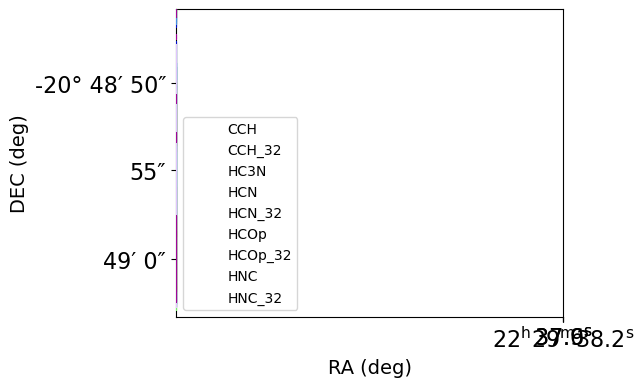

In [20]:
source12 = '13CO'
path12 = globule + '_' + source12 + '.image.pbcor.fits'
cube12 = fits.open(path12)
data_12 = cube12[0].data
header12 = cube12[0].header

data1_12 = data_12[0,:,:,:]

ra_start12 = header12["CRVAL1"]
ra_inc12 = header12["CDELT1"]

channels12 = np.arange(header12["NAXIS1"]) - header12["CRPIX1"]+1

ra12 = ra_start12 + (ra_inc12 * channels12)
ra12 = np.array(ra12, dtype = float)

dec_start12 = header12["CRVAL2"]
dec_inc12 = header12["CDELT2"]

channels1_12 = np.arange(header12["NAXIS2"]) - header12["CRPIX2"]+1

dec12 = dec_start12 + (dec_inc12 * channels1_12)
dec12 = np.array(dec12, dtype = float)

#These are generally the velocities that have all of the emission
if globule == 'GlobB':
    x1_12 = round(header12["CRPIX1"]-(ra_start12-337.43248)/ra_inc12)-1
    x2_12 = round(header12["CRPIX1"]-(ra_start12-337.428)/ra_inc12)-1
    y1_12 = round(header12["CRPIX2"]-(dec_start12+20.8175)/dec_inc12)-2
    y2_12 = round(header12["CRPIX2"]-(dec_start12+20.81354)/dec_inc12)-2
    d12 = 0.25
elif globule == 'GlobC':
    x1_12 = round(header12["CRPIX1"]-(ra_start12-337.40975)/ra_inc12)-1
    x2_12 = round(header12["CRPIX1"]-(ra_start12-337.40565)/ra_inc12)-1
    y1_12 = round(header12["CRPIX2"]-(dec_start12+20.80087)/dec_inc12)-2
    y2_12 = round(header12["CRPIX2"]-(dec_start12+20.796)/dec_inc12)-2
    d12 = 0
    
data2_12 = data1_12[:, :, np.arange(x1_12, x2_12)]
data3_12 = data2_12[:, np.arange(y1_12, y2_12), :]
    
integrated12 = np.sum(data3_12[:, :, :], axis = 0)
 
max_val12 = np.nanmax(integrated12)
    
a12 = [x for x in range(len(data1_12[:, 0, 0]))]
array12 = []
for i in range(len(a12)):
    if np.nanmax(data3_12[a12[i], :, :]) > d12*max_val12:
        array12.append(a12[i])
    
moment0_12 = np.sum(data3_12[array12, :, :], axis = 0)
    
max_value12 = np.nanmax(moment0_12)
min_value12 = np.nanmin(moment0_12)
    
extent12=[ra12[x1_12],ra12[x2_12],dec12[y1_12],dec12[y2_12]]
print(extent12)
ra_x12 = np.linspace(ra12[x1_12], ra12[x2_12], (x2_12-x1_12))
dec_y12 = np.linspace(dec12[y1_12], dec12[y2_12], (y2_12-y1_12))

sigma_mask12 = sigma_clip(moment0_12, sigma=3, maxiters=None, cenfunc='mean')
newmask12 = (moment0_12 < np.amax(sigma_mask12))
    
mom0_12 = np.ma.array(moment0_12, mask = newmask12)

fig = plt.figure(figsize = [5,4])
ax = fig.add_subplot(111)

#CS1 = ax.contour(-ra_x1, dec_y1, newmask1, levels = 0, colors = 'xkcd:fire engine red', origin = "lower", zorder = 1, extent = extent1)
#CS2 = ax.contour(-ra_x12, dec_y12, newmask12, levels = 0, colors = 'xkcd:shocking pink', origin = "lower", zorder = 2, extent = extent12)
#CS3 = ax.contour(-ra_x2, dec_y2, newmask2, levels = 0, colors = 'xkcd:scarlet', origin = "lower", zorder = 3, extent = extent2)
CS4 = ax.contour(-ra_x3, dec_y3, newmask3, levels = 0, colors = 'xkcd:pumpkin', origin = "lower", zorder = 4, extent = extent3)
CS5 = ax.contour(-ra_x4, dec_y4, newmask4, levels = 0, colors = 'xkcd:apricot', origin = "lower", zorder = 5, extent = extent4)
CS6 = ax.contour(-ra_x5, dec_y5, newmask5, levels = 0, colors = 'xkcd:bright yellow', origin = "lower", zorder = 6, extent = extent5)
CS7 = ax.contour(-ra_x6, dec_y6, newmask6, levels = 0, colors = 'xkcd:lighter green', origin = "lower", zorder = 7, extent = extent6)
CS8 = ax.contour(-ra_x7, dec_y7, newmask7, levels = 0, colors = 'xkcd:emerald green', origin = "lower", zorder = 8, extent = extent7)
CS9 = ax.contour(-ra_x8, dec_y8, newmask8, levels = 0, colors = 'xkcd:true blue', origin = "lower", zorder = 9, extent = extent8)
CS10 = ax.contour(-ra_x9, dec_y9, newmask9, levels = 0, colors = 'xkcd:dark sky blue', origin = "lower", zorder = 10, extent = extent9)
CS11 = ax.contour(-ra_x10, dec_y10, newmask10, levels = 0, colors = 'xkcd:light lavender', origin = "lower", zorder = 11, extent = extent10)
CS12 = ax.contour(-ra_x11, dec_y11, newmask11, levels = 0, colors = 'xkcd:barney purple', origin = "lower", zorder = 12, extent = extent12)

if globule == 'GlobB':
    dec_val4 = np.abs(dec12 + 20.8141667).argmin()
    dec_val3 = np.abs(dec12 + 20.815).argmin()
    dec_val2 = np.abs(dec12 + 20.81583).argmin()
    dec_val1 = np.abs(dec12 + 20.81667).argmin()
    ax.set_yticks([dec[dec_val1], dec[dec_val2], dec[dec_val3], dec[dec_val4]])
    ax.set_yticklabels(['49′ 00″','57″','54″','-20° 48′ 51″'], fontsize = 12)
    
    ra_val1 = np.abs(ra12 - 337.4325000).argmin()
    ra_val2 = np.abs(ra12 - 337.4316667).argmin()
    ra_val3 = np.abs(ra12 - 337.4308333).argmin()
    ra_val4 = np.abs(ra12 - 337.4300000).argmin()
    ra_val5 = np.abs(ra12 - 337.4291667).argmin()
    ra_val6 = np.abs(ra12 - 337.4283333).argmin()
    print(ra[ra_val1], ra[ra_val2])
    ax.set_xticks([-ra[ra_val1], -ra[ra_val2], -ra[ra_val3], -ra[ra_val4], -ra[ra_val5], -ra[ra_val6]])
    ax.set_xticklabels(['$\mathrm{22^{h}29^{m}43.8^{s}}$', '$\mathrm{43.6^{s}}$', '$\mathrm{43.4^{s}}$',
                       '$\mathrm{43.2^{s}}$', '$\mathrm{43.0^{s}}$', '$\mathrm{42.8^{s}}$'],
                      fontsize = 12)
    
elif globule == 'GlobC':
    #dec_val4 = np.abs(dec12 + 20.79722).argmin()
    #dec_val3 = np.abs(dec12 + 20.79861).argmin()
    #dec_val2 = np.abs(dec12 + 20.80000).argmin()
    #dec_val1 = np.abs(dec12 + 20.801389).argmin()
    #ax.set_yticks([dec12[dec_val1], dec12[dec_val2], dec12[dec_val3], dec12[dec_val4]])
    #ax.set_yticklabels(['05″','48′ 00″','55″','-20° 47′ 50″'], fontsize = 12)
    
    #ra_val1 = np.abs(ra12 - 337.4091667).argmin()
    #ra_val2 = np.abs(ra12 - 337.4083333).argmin()
    #ra_val3 = np.abs(ra12 - 337.4075000).argmin()
    #ra_val4 = np.abs(ra12 - 337.4066667).argmin()
    #ra_val5 = np.abs(ra12 - 337.4058333).argmin()
    #ax.set_xticks([-ra12[ra_val1], -ra12[ra_val2], -ra12[ra_val3], -ra12[ra_val4], -ra12[ra_val5]])
    #ax.set_xticklabels(['$\mathrm{22^{h}29^{m}38.2^{s}}$', '$\mathrm{38.0^{s}}$', '$\mathrm{37.8^{s}}$',
                       #'$\mathrm{37.6^{s}}$', '$\mathrm{37.4^{s}}$'], fontsize = 12)
    
    ra_val1 = np.abs(ra12 - 337.4091667 ).argmin()
    ra_val2 = np.abs(ra12 - 337.4079167).argmin()
    ra_val3 = np.abs(ra12 - 337.4066667).argmin()
    #ra_val4 = np.abs(ra - 337.4287500).argmin()
    ax.set_xticks([ra12[ra_val1], ra12[ra_val2], ra12[ra_val3]])
    ax.set_xticklabels(['$\mathrm{22^{h}29^{m}38.2^{s}}$', '$\mathrm{37.9^{s}}$', '$\mathrm{37.6^{s}}$'], fontsize = 16)

    dec_val4 = np.abs(dec12 + 20.7972222).argmin()
    dec_val3 = np.abs(dec12 + 20.7986111).argmin()
    dec_val2 = np.abs(dec12 + 20.8000000).argmin()
    #dec_val1 = np.abs(dec + 20.8180556).argmin()
    ax.set_yticks([dec12[dec_val2], dec12[dec_val3], dec12[dec_val4]])
    ax.set_yticklabels(['49′ 0″','55″','-20° 48′ 50″'], fontsize = 16)

#labels1 = [source1]
#for i in range(len(labels1)):
    #CS1.collections[i].set_label(labels1[i])
    
#labels12 = [source12]
#for i in range(len(labels12)):
    #CS2.collections[i].set_label(labels12[i])

#labels2 = [source2]
#for i in range(len(labels2)):
    #CS3.collections[i].set_label(labels2[i])
    
labels3 = [source3]
for i in range(len(labels3)):
    CS4.collections[i].set_label(labels3[i])
    
labels4 = [source4]
for i in range(len(labels4)):
    CS5.collections[i].set_label(labels4[i])
    
labels5 = [source5]
for i in range(len(labels5)):
    CS6.collections[i].set_label(labels5[i])
    
labels6 = [source6]
for i in range(len(labels6)):
    CS7.collections[i].set_label(labels6[i])
    
labels7 = [source7]
for i in range(len(labels7)):
    CS8.collections[i].set_label(labels7[i])
    
labels8 = [source8]
for i in range(len(labels8)):
    CS9.collections[i].set_label(labels8[i])
    
labels9 = [source9]
for i in range(len(labels9)):
    CS10.collections[i].set_label(labels9[i])
    
labels10 = [source10]
for i in range(len(labels10)):
    CS11.collections[i].set_label(labels10[i])
    
labels11 = [source11]
for i in range(len(labels11)):
    CS12.collections[i].set_label(labels11[i])

plt.legend(loc='lower left')

#plt.xlim(ra1[x1_1], ra1[x2_1])
plt.xticks()
plt.yticks()
plt.xlabel('RA (deg)',fontsize=14)
plt.ylabel('DEC (deg)',fontsize=14)
#plt.colorbar(label = r'Integrated Instensity ($\mathrm{K\,kms^{-1}}$)', fraction=0.048, pad=0.04)
#plt.title('Contour Comparisons for ' + globule, fontsize= 20)
plt.savefig(globule+' Contours.png', bbox_inches='tight')